<a href="https://colab.research.google.com/github/crazy85128x/ML0930/blob/master/face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 40kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=f1ecaec75d6c355fcb0b990ec2bc7142208e2a978160b4117bf48989563075cf
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


TRUMP [-0.11854183  0.09261675  0.05320959 -0.00719682 -0.09798818 -0.0224531
 -0.08131686 -0.16523671  0.14279795 -0.10755627  0.27372199 -0.06741664
 -0.21301687 -0.10110298 -0.11360289  0.17516917 -0.18284354 -0.13673469
 -0.00784149 -0.03170217  0.12443759  0.00565474 -0.02778232  0.03870571
 -0.09028991 -0.31492814 -0.09864406 -0.07982041 -0.01299415 -0.04979935
 -0.05018643  0.06551194 -0.18987776 -0.03963938 -0.00812135  0.0881203
 -0.00884027 -0.02492257  0.14157705  0.00068356 -0.19432935  0.01349349
  0.03237899  0.19556645  0.14243524  0.08631204  0.01983685 -0.16277379
  0.09224288 -0.12345596  0.04419617  0.18985559  0.10937138  0.05448524
 -0.01153218 -0.18090548 -0.0201231   0.08067992 -0.07583369  0.03970036
  0.07284029 -0.12672399 -0.01297317 -0.07419392  0.21950483  0.05306825
 -0.12426916 -0.15854983  0.14028086 -0.1097544  -0.14885262  0.03148669
 -0.15419769 -0.18200952 -0.38850102  0.06638842  0.43253198  0.0499995
 -0.18852544  0.05331954 -0.03904936 -0.00374694

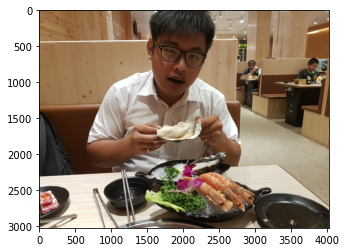

In [3]:
import face_recognition
import matplotlib.pyplot as plt

img = face_recognition.load_image_file("李安.jpg")
en = face_recognition.face_encodings(img)[0]
print('TRUMP', en)
plt.imshow(img)

In [4]:
import glob
import os
formats = ["jpg", "png", "jpeg"]
fn = []
for f in formats:
    fn = fn + glob.glob("*.{}".format(f))
    fn = fn + glob.glob("*.{}".format(f.upper()))
encodings = []
names = []
for f in fn:
    try:
        img = face_recognition.load_image_file(f)
        en = face_recognition.face_encodings(img)[0]  
        encodings.append(en)
        n = os.path.basename(f).split(".")[0]
        names.append(n)
    except IndexError:
        print(f, "找不到人臉")
print(names)

['李安', 'Siangjun_Li']


網址:https://lh3.googleusercontent.com/yYvKQxTjq551hXKPxJRMAfFWtaS4-bXJry4Z_P0lmI5KPSFm-IzXYSSnyLait5EsRZaTGXvf-xOfJFwUom8G6Jg1g3oe6Co8JT8Ly9_hRjOLIcIx136VFe1UCpJmEvChYulbXqzZDQJHPuoPhdnDu4qMGt0qR-Y24o1XC_AUoMT5UJwkBQaHp6xM-bIMzcvodyw7PSgeGBwsf3GtF-1cG7MppFYXzojuFX8i4iDxvSRvGneCnFGKTpc4-OsyBSjH7XfeO08N0yKPELDpDf_cUsNRBdcz_x-ve3HMrDgXRjkJChyTArXKfIariu3BkR5W90awIR_MXkMpnxT2R5F4sxjtBqwjnEkcRBYRD4Nwhfdbg_TLOzhTgWwttIBNfL9M5pmD25ZgZsNcNTE5BvY95RgwddsiVH8ChZmqflU0gGmATyCAGYs1NO5k7ricRnFJ4xYnKxG984ettyCebR-DD0AH0DX2WXtHSlIoJsSkKuljkwmmtn3e_x-_H_MIzvaGNnKJkCuC_LqEr1qZMIEA3xUja2-luk7sCRhOYAEQqXXxQR1E8hb9S6eRxD8PLKNVaHUb3w14wjJ5Qd8G_kuXdDPlGz6YiOvjix6lX0ACYtImjf78lbACb1NdIth64UAIhoqSdDGabIklwV9-N07MfaEU1oJkhgoqxD_PDWxevhTgsZ0IPqHoVS3RSUn0hw=w469-h625-no?authuser=0


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


李安 的距離: 0.4272161065190901
Siangjun_Li 的距離: 0.6149905506138721
最相近: 李安
------------------------------


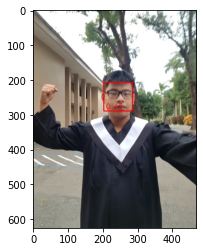

In [5]:
#爬蟲
import cv2
import requests
headers = {
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36"
}
url = input("網址:")
response = requests.get(url, headers=headers, stream=True, verify=False)
img = face_recognition.load_image_file(response.raw)

locs = face_recognition.face_locations(img, model="cnn")
ens = face_recognition.face_encodings(img, known_face_locations=locs)

for en, loc in zip(ens, locs):
    (top, right, bottom, left) = loc
    cv2.rectangle(img, (left, top), (right, bottom), (255, 0, 0), 2)
    distances = face_recognition.face_distance(en, encodings)
    for na, dis in zip(names, distances):
        print(na, "的距離:", dis)
    print("最相近:", names[distances.argmin()])
    print("-" * 30)
    font = cv2.FONT_HERSHEY_DUPLEX
    d = str(round(min(distances), 2))
    cv2.putText(img, d, (left + 6, bottom - 6), font, 0.7, (255, 0, 0), 1)

plt.imshow(img)